Analysis of all-to-all connected excitory oscillators networks


Author Henrik Horst, Supervisor Maximiliane Noll

16.05.2022

In [1]:
#import relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import powerlaw

 

# Set the random seed for data generation (just for test cases)

np.random.seed(42)

# Set spike threshold (above this value the output value of an oscillator is considered a spike)
th=1

First let's define a function to extract the spikes from the simulation data

In [2]:
def get_spikes(arr,th=th, rise=True):
  '''
    Function for extracting spikes from a block of the oscillators output 
    voltage values given the spiking threshold.
    Parameters:
        arr: array of voltage values, each column corresponds to one oscillator, a numpy array
        th: threshold value above which the output voltage is considered to be a spike, a scalar
        rise: For True get the time value where voltage goes above the threshold(beginning of the spike) and for False where the voltage
              goes below the threshold (end of spike)
    Returns:
        an array to filter the arr or any other corresponding array for the extracted values
        (think of this as an indexing block which gives you just the values which we want by the operation specified in this function)
  '''
  NST = np.diff(np.sign(arr-th),axis=0) 
  #print(NST)
  if rise==True:
    NST = np.where(NST>1)
  if rise==False:
    NST = np.where(NST<-1)
  #print(NST)
  return NST

##Load data

In [3]:
#os.getcwd()

In [4]:
#os.chdir('data')#C:\Users\h3nr1\PycharmProjects\edgeofchaos\data

In [3]:
#read in data from LTSpice into pandas dataframe
df = pd.read_csv('./data/MixedCaps180s/fireflys100_1OhmCouplingResistance.txt', delimiter = "\t")

In [4]:
df.head()

,time,V(k1),V(k2),V(k3),V(k4),V(k5),V(k6),V(k7),V(k8),V(k9),...,V(k91),V(k92),V(k93),V(k94),V(k95),V(k96),V(k97),V(k98),V(k99),V(k100)
0,0.000000,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
1,0.000031,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
2,0.000092,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
3,0.000458,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
4,0.000946,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001


In [5]:
df.shape[1]

101

In [6]:
#extract values from the dataframe
spike_data=df.iloc[:,1:].values #now data in numpy array format
print(spike_data.shape)
spike_data=np.concatenate((np.zeros((1,df.shape[1]-1)), spike_data), axis=0) #this is due to the np.diff in the get_spikes function which
#takes the difference of two values, so to consider also the first value on its own we have to add a zero in front, this is also
#necessary to not induce a time shift in the filtered time array with the reurn value from get_spike()
print(spike_data.shape)
time=df.iloc[:,0].values

(2398954, 100)
(2398955, 100)


##Assemble the data

In [7]:
number_of_oscillators=spike_data.shape[1]

In [8]:
#write spike times in form of different lengths numpy arrays into one list with each entry the spikes of one oscillator
all_spike_start_times=[]
for i in range(number_of_oscillators):
  all_spike_start_times.append(time[get_spikes(spike_data[:,i])])



In [10]:
all_spike_start_times[0][:15]

array([ 1.03545299,  2.004259  ,  2.97295528,  3.94164011,  4.9101455 ,
        5.87866168,  6.84725911,  7.81568837,  8.78422389,  9.75275168,
       10.7211426 , 11.68911528, 12.65765268, 13.62595823, 14.59438558])

In [9]:
for i in range(len(all_spike_start_times)):
        print(i,all_spike_start_times[i].shape)
        

0 (185,)
1 (308,)
2 (262,)
3 (228,)
4 (364,)
5 (181,)
6 (300,)
7 (256,)
8 (223,)
9 (355,)
10 (185,)
11 (263,)
12 (229,)
13 (202,)
14 (363,)
15 (180,)
16 (257,)
17 (224,)
18 (198,)
19 (355,)
20 (177,)
21 (293,)
22 (250,)
23 (218,)
24 (347,)
25 (173,)
26 (287,)
27 (245,)
28 (213,)
29 (339,)
30 (176,)
31 (251,)
32 (218,)
33 (193,)
34 (346,)
35 (172,)
36 (245,)
37 (213,)
38 (189,)
39 (339,)
40 (169,)
41 (280,)
42 (239,)
43 (208,)
44 (332,)
45 (165,)
46 (274,)
47 (234,)
48 (204,)
49 (325,)
50 (168,)
51 (240,)
52 (209,)
53 (185,)
54 (331,)
55 (165,)
56 (234,)
57 (204,)
58 (181,)
59 (324,)
60 (161,)
61 (268,)
62 (263,)
63 (225,)
64 (352,)
65 (172,)
66 (280,)
67 (235,)
68 (201,)
69 (359,)
70 (161,)
71 (229,)
72 (228,)
73 (197,)
74 (348,)
75 (170,)
76 (237,)
77 (203,)
78 (204,)
79 (351,)
80 (171,)
81 (273,)
82 (261,)
83 (218,)
84 (335,)
85 (185,)
86 (294,)
87 (241,)
88 (201,)
89 (321,)
90 (167,)
91 (229,)
92 (223,)
93 (189,)
94 (326,)
95 (180,)
96 (246,)
97 (206,)
98 (178,)
99 (320,)


Calculating best minimal value for power law fit


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
C:\Users\h3nr1\PycharmProjects\edgeofchaos\venv\lib\site-packages\powerlaw.py:1156: RuntimeWarning: invalid value encountered in double_scalars
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
C:\Users\h3nr1\PycharmProjects\edgeofchaos\venv\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in double_scalars
  return 1 + len(data)/sum(log(data / (self.xmin)))
Not enough data. Returning nan
Not enough data. Returning nan
C:\Users\h3nr1\PycharmProjects\edgeofchaos\venv\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\h3nr1\PycharmProjects\edgeofchaos\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No valid fits found.
Not enough data. Returning nan


nan
nan
R: 0, p: 1
Calculating best minimal value for power law fit
3.173541664986885%
6919.0
R: 0.10522532147127445, p: 0.9161970186275319
Calculating best minimal value for power law fit
2.6776042018865946
313.0
R: -0.7277688452243816, p: 0.4667550988262156
Calculating best minimal value for power law fit
6.776625303450334%
56.0
R: -1.1518303901484928, p: 0.24939077715038138
Calculating best minimal value for power law fit
4.888999727619627%
11.0
R: -2.5720136160025446, p: 0.01011089151361312
Calculating best minimal value for power law fit
13.219094277030878
12.0
R: -1.0742760711119457, p: 0.2826989665084645
Calculating best minimal value for power law fit
6.709594717847073%
7.0
R: -2.004144534029671, p: 0.045054580082504146
Calculating best minimal value for power law fit
6.198491076931675%
4.0
R: -1.5054467754186747, p: 0.13220925096216074
Calculating best minimal value for power law fit
4.401646068822865%
2.0
R: -12.304065239152585, p: 8.612776249587742e-35
Calculating best minim

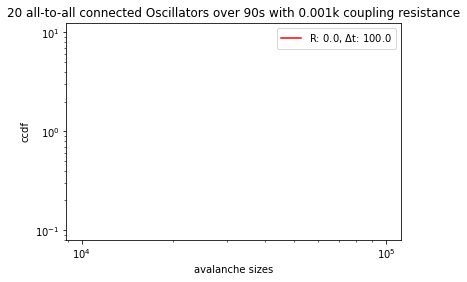

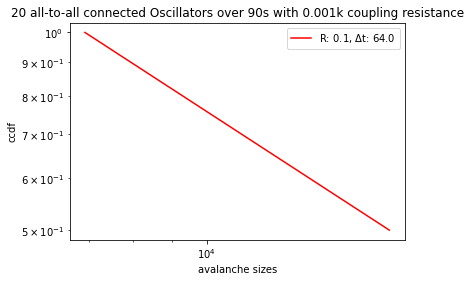

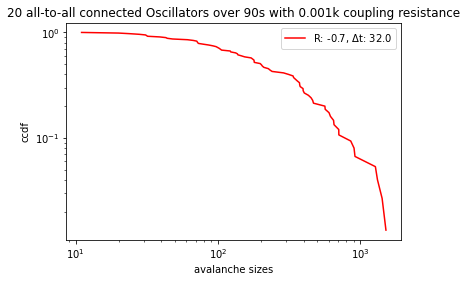

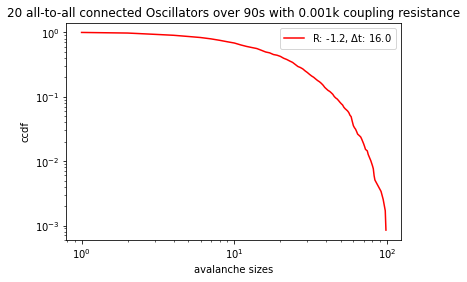

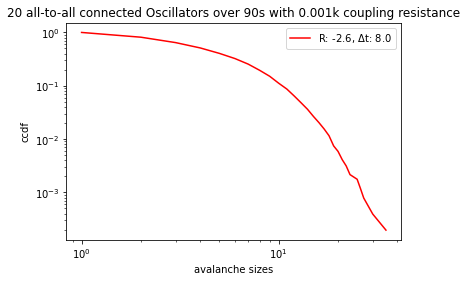

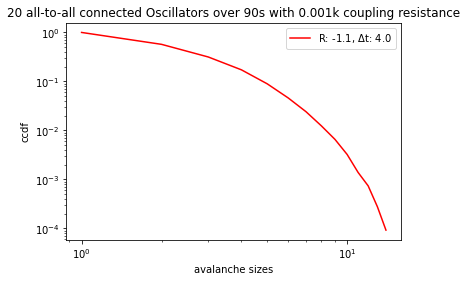

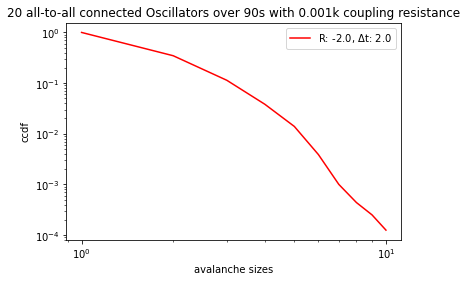

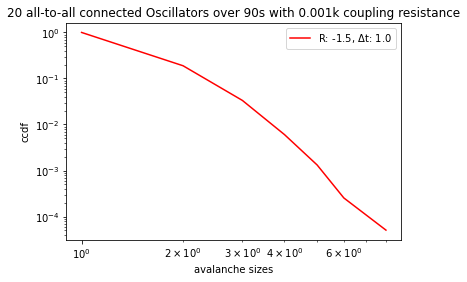

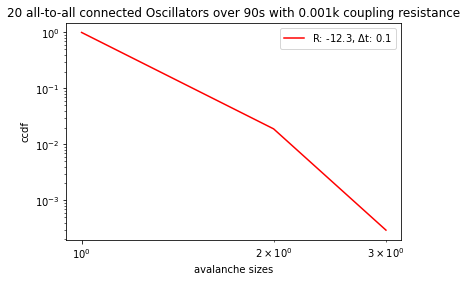

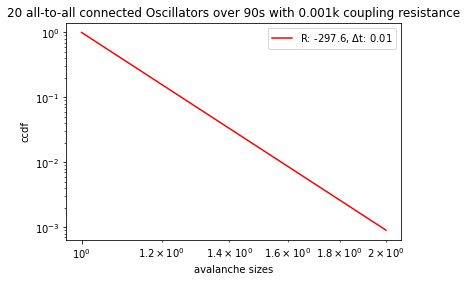

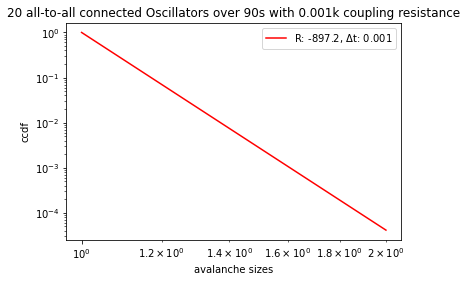

In [11]:
#set frame duration -> in the paper this ranged from 1 to 16ms
frame_duration=[0.1,0.064,0.032,0.016,0.008,0.004,0.002,0.001,0.0001,0.00001,0.000001]#50ms
t_simulation=180
Rs=[]
for f in frame_duration:

  frames = np.linspace(0,t_simulation,int(t_simulation/f)+1)

  spiking_neurons_per_frame=np.zeros(len(frames))
  for i in range(len(all_spike_start_times)):
    for j in np.digitize(all_spike_start_times[i],frames):
      spiking_neurons_per_frame[j-1]+=1

  avalanche_sizes=[]
  curr_avalanche=False
  for elem in spiking_neurons_per_frame:
    if elem>0:
      if curr_avalanche==False:
        avalanche_sizes.append(elem)
        curr_avalanche=True
      else:
        avalanche_sizes[-1]+=elem
    

    else:
      curr_avalanche=False

  import powerlaw

  results = powerlaw.Fit(avalanche_sizes, discrete=True)
  print(results.power_law.alpha)
  print(results.power_law.xmin)
  R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)#'truncated_power_law', 'lognormal'
  print(f"R: {R}, p: {p}")
  Rs.append(R)

  plt.figure()
  powerlaw.plot_ccdf(avalanche_sizes, color='r', label=f'R: {R:.1f}, $Δ$t: {1000*f}')
  plt.legend()
  plt.xlabel('avalanche sizes')
  plt.ylabel('ccdf')
  plt.title('20 all-to-all connected Oscillators over 90s with 0.001k coupling resistance')
  #plt.savefig(f'outputs/fireflies20_ccdf_1_{1000*f}ms.png')

In [12]:
Rs

[0,
 0.10522532147127445,
 -0.7277688452243816,
 -1.1518303901484928,
 -2.5720136160025446,
 -1.0742760711119457,
 -2.004144534029671,
 -1.5054467754186747,
 -12.304065239152585,
 -297.55783205190323,
 -897.1923293732194]

In [28]:
#rs = pd.DataFrame({'1':Rs}, index=['$Δ$t: 100.0ms','$Δ$t: 64.0ms','$Δ$t: 32.0ms','$Δ$t: 16.0ms','$Δ$t: 8.0ms','$Δ$t: 4.0ms','$Δ$t: 2.0ms','$Δ$t: 1.0ms','$Δ$t: 0.1ms','$Δ$t: 0.01ms','$Δ$t: 0.001ms'])

In [29]:
#rs.head(10)

In [30]:
r_df=pd.read_csv('R_values_fireflies100_180s.csv',index_col=0)

In [31]:
r_df.head(10)

,1,1k,2k,3k,4k,5k,6k,7k,8k,9k,...,11k,12k,13k,14k,15k,16k,17k,18k,19k,20k
$Δ$t: 100.0ms,3.337721,0.810429,1.704081,5.713207,-5.298501,-3.456437,-3.721798,-7.673341,-0.415694,-0.497484,...,-0.395692,-0.452807,-0.452807,-0.351908,-0.305226,-0.331813,-0.367911,-0.441432,-0.228947,-0.321337
$Δ$t: 64.0ms,3.899112,2.632228,0.054821,9.226633,12.337119,11.875021,12.461095,11.279649,10.777922,10.696341,...,10.606813,10.795037,10.827627,10.631012,10.713412,10.706211,10.591854,10.651879,10.774764,10.591854
$Δ$t: 32.0ms,0.726001,-1.262841,-2.260036,33.915308,27.839335,26.537678,23.983219,20.400340,16.852318,16.852318,...,16.852318,16.771025,16.852318,16.852318,16.852318,16.852318,16.852318,16.852318,16.852318,16.965958
$Δ$t: 16.0ms,1.487922,-0.072186,-0.830829,47.636715,47.045831,45.875365,47.613591,42.691538,30.197252,30.602338,...,31.100658,31.101265,30.879820,31.599957,30.711337,30.879861,30.865908,31.336667,30.449458,31.152421
$Δ$t: 8.0ms,1.513661,0.941596,-0.521541,52.184647,57.546912,57.703087,63.738271,60.951950,52.688903,53.314134,...,53.089898,53.623863,53.210929,53.779130,52.865159,52.387181,54.089949,53.623863,53.596093,53.204638
$Δ$t: 4.0ms,0.992365,1.637085,-0.325898,53.455126,59.023448,59.479858,66.170397,65.296721,59.616703,59.527831,...,59.515890,59.557767,59.395202,59.458943,59.482715,59.682218,59.482715,59.569726,59.705401,59.295578
$Δ$t: 2.0ms,-0.076772,1.894380,0.715473,54.831195,60.457058,60.441094,66.896428,65.946896,60.299764,60.070346,...,59.976814,59.972341,60.031130,60.063318,60.029470,60.098150,60.136429,60.002971,60.133224,60.189010
$Δ$t: 1.0ms,-1.489603,3.678589,1.655717,54.745282,66.461570,66.836890,68.179554,69.384723,68.108006,67.484951,...,66.590727,66.301173,66.356785,66.273370,66.042840,66.118484,65.884447,65.998256,66.051125,65.688925
$Δ$t: 0.1ms,-8.839995,0.879684,3.497751,2.871415,12.392915,14.118647,13.921116,13.830393,15.129879,17.060157,...,16.849160,16.923934,16.858546,17.256262,17.002968,17.510881,15.793718,18.328790,17.795139,18.271858
$Δ$t: 0.01ms,-131.550238,-125.150059,-8.582081,-13.232486,-118.922625,-16.060987,-9.429553,-9.075445,-8.711468,-8.879348,...,-9.263931,-9.601595,-10.704067,-9.684513,-11.020191,-9.809038,-10.032969,-11.679069,-12.544921,-11.416240


In [32]:
r_df['1meg']=Rs

In [33]:
r_df.to_csv('R_values_fireflies100_180s.csv')

In [34]:
#rs.to_csv('R_values_fireflies100_180s.csv')

In [ ]:
r_df.to_csv('R_values_fireflies100_180s.csv')